In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables

Base.prepare(autoload_with=engine)

Base.classes.keys()

['measurement', 'station']

In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station


In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

inspector = inspect(engine)

inspector.get_table_names()

#code below to check for columns name and data type
columns = inspector.get_columns('measurement')
for column in columns:
     print(column["name"], column["type"])



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print(recent_date)

latest_date = dt.datetime(2017,8,23)

2017-08-23


In [138]:

query_yearly = latest_date - dt.timedelta(days=365)

columns_station = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


Text(0.5, 0, 'Date')

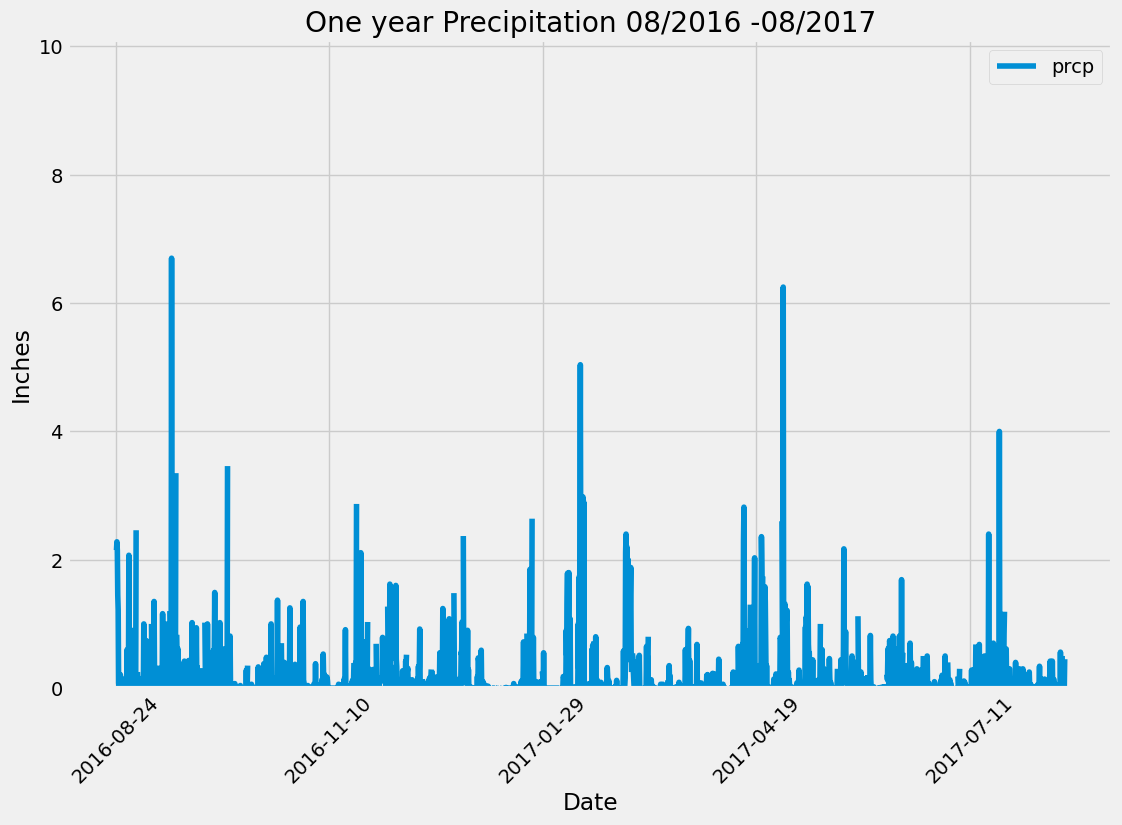

In [129]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.datetime(2017,8,23)
# Calculate the date one year from the last date in data set.

query_yearly = latest_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

data_precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_yearly).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

date_prcp_df = pd.DataFrame(data_precipitation_scores)

date_prcp_df 

# setting index because without this the bar graph looks really weird
date_prcp_df = date_prcp_df.set_index('date')

# Sort the dataframe by date
sorted_df = date_prcp_df.sort_values(by = ["date"])

sorted_df
# Use Pandas Plotting with Matplotlib to plot the data

sorted_df.plot(title = 'One year Precipitation 08/2016 -08/2017' , figsize = (12,8), rot = 45)
plt.legend(loc = 'upper right')
plt.ylim(0,10.10)
plt.ylabel('Inches')
plt.xlabel('Date')

In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data
stat_prcp = sorted_df.describe()

stat_prcp



,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number of stations in the dataset

# total_station = engine.execute("SELECT COUNT(DISTINCT station) FROM measurement")
# total_station.fetchall()

total_stations = session.query(Station.id).count()
print(total_stations)


9


In [125]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_station=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and their counts in descending order.
most_active_station



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [126]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
temperature

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'tobs frequency')

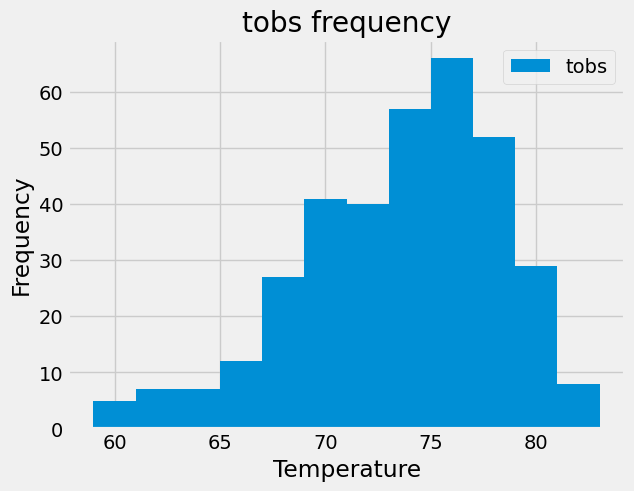

In [144]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= query_yearly)

yearly_temp_df = pd.DataFrame(temp_data)


yearly_temp_df.plot(kind = "hist", bins = 12)
plt.xlabel("Temperature")
plt.title("tobs frequency")

# Close Session

In [145]:
# Close Session
session.close()